In [1]:
import pandas as pd
import numpy as np
import matplotlib as mtp
import matplotlib.pyplot as plt
import seaborn as sns

donnees = pd.read_csv("../../jeux_de_données/120-years-of-olympic-history-athletes-and-results.csv", index_col=[1])
donnees

# Création du nouveau Dataset sans les lignes contenant les valeurs manquantes
donnees_NaN_supprimes = donnees.dropna()
donnees_NaN_supprimes = donnees_NaN_supprimes.drop_duplicates()
donnees_NaN_supprimes.isnull().sum()

donnees_NaN_remplaces = donnees.drop_duplicates()
donnees_NaN_remplaces

donnees['Medal']=donnees['Medal'].fillna("None")
donnees_NaN_supprimes = donnees.dropna()
donnees_NaN_supprimes = donnees_NaN_supprimes.drop_duplicates()
donnees_NaN_supprimes.isnull().sum()
moyennes=donnees[['Age','Height','Weight']].mean()
donnees[['Age','Height','Weight']]=donnees[['Age','Height','Weight']].fillna(moyennes)
donnees_NaN_remplaces=donnees.drop_duplicates()

print("Tableau avec NaN remplacés")
print(donnees_NaN_remplaces.shape)
print("Tableau avec NaN supprimés")
print(donnees_NaN_supprimes.shape)

Tableau avec NaN remplacés
(269731, 14)
Tableau avec NaN supprimés
(206152, 14)


# pairplot()

<Figure size 432x288 with 0 Axes>

<Figure size 560x350 with 0 Axes>

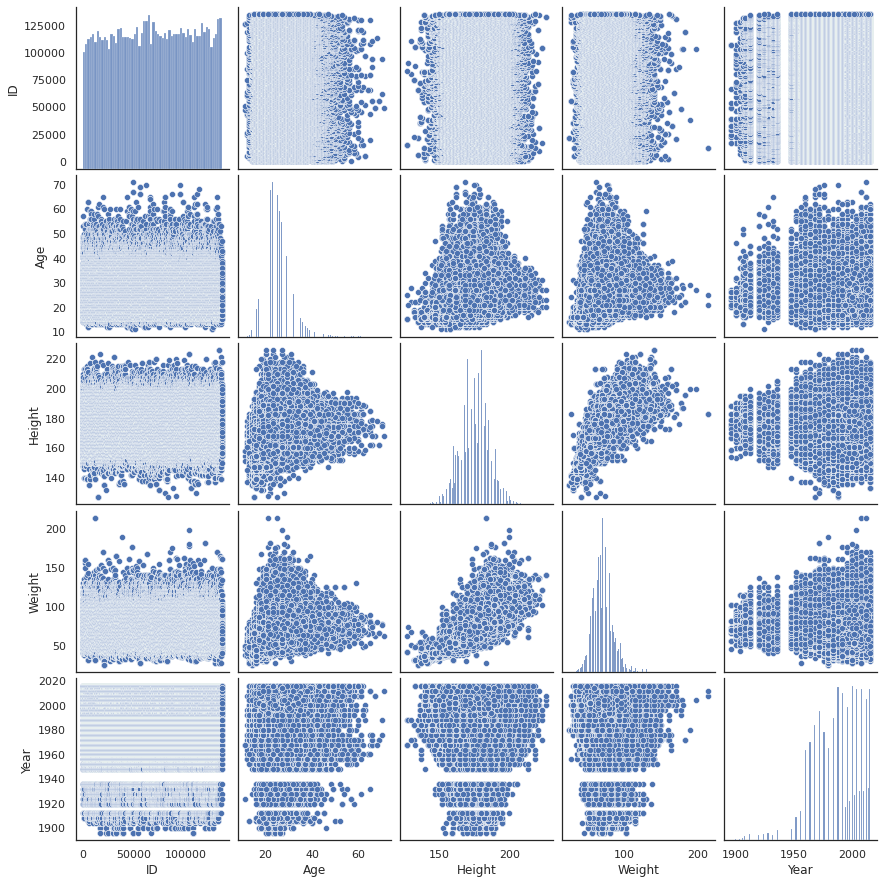

In [2]:
plt.figure()
plt.figure(figsize = (8,5), dpi=70)

sns.set(style="white",color_codes=True)
sns.pairplot(data=donnees_NaN_supprimes)
plt.show()
plt.close()

<Figure size 432x288 with 0 Axes>

<Figure size 560x350 with 0 Axes>

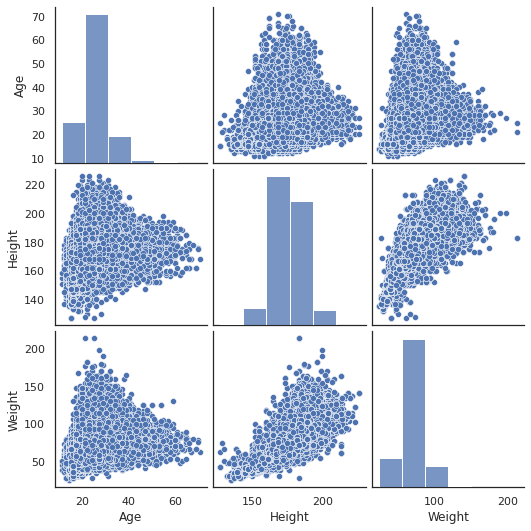

In [3]:
plt.figure()
plt.figure(figsize = (8,5), dpi=70)

donnees_pairplot = donnees_NaN_supprimes.drop(columns=["ID","Year"])

sns.set(style="white",color_codes=True)
sns.pairplot(data=donnees_pairplot, diag_kws=dict(bins=6))
plt.show()
plt.close()

<Figure size 432x288 with 0 Axes>

<Figure size 560x350 with 0 Axes>

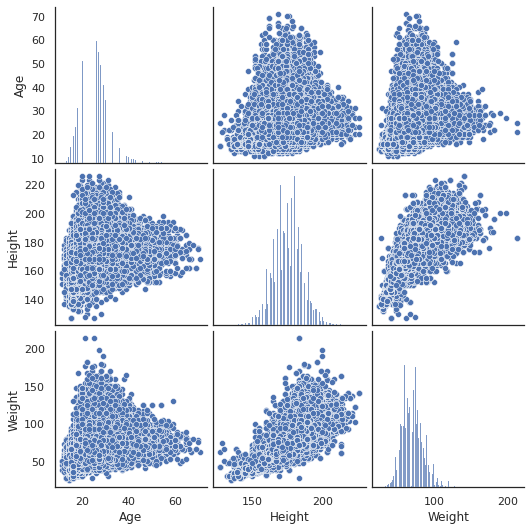

In [4]:
plt.figure()
plt.figure(figsize = (8,5), dpi=70)

donnees_pairplot = donnees_NaN_supprimes.drop(columns=["ID","Year"])

sns.set(style="white",color_codes=True)
sns.pairplot(data=donnees_pairplot)
plt.show()
plt.close()

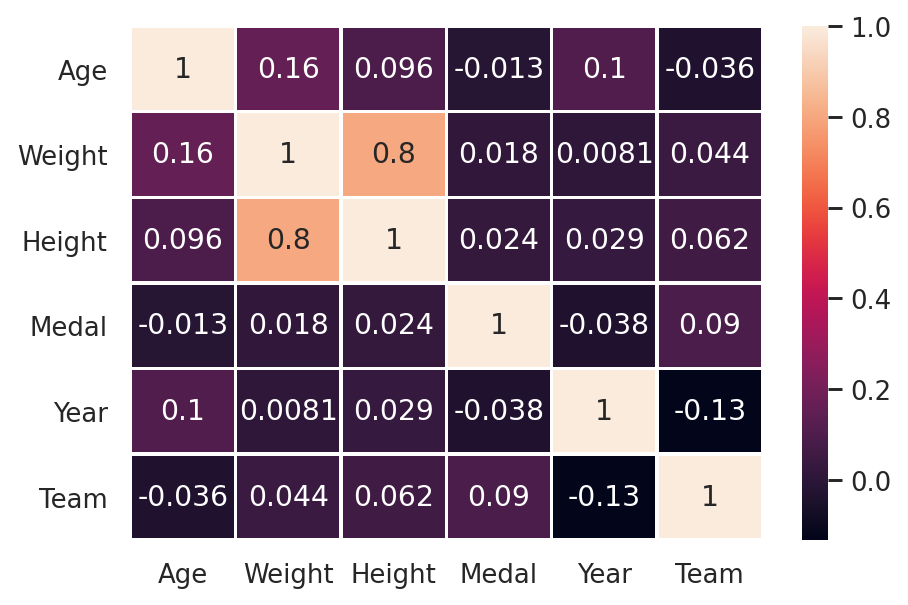

In [5]:
sns.set(rc={"figure.dpi" : 170})

medal = (donnees_NaN_supprimes["Medal"]=="Gold") | (donnees_NaN_supprimes["Medal"]=="Silver") | (donnees_NaN_supprimes["Medal"]=="Bronze")

donnees_heatmap = donnees_NaN_supprimes.loc[medal]
donnees_heatmap = donnees_heatmap[["Sex","Age","Weight","Height","Medal","Year","Team"]]
dictionnaire = {"Bronze":1,"Silver":2,"Gold":3}

#On utilise la méthode map(), qui permet de remplacer les modalités par les chiffres de 
donnees_heatmap["Medal"] = donnees_heatmap["Medal"].map(dictionnaire)
donnees_heatmap["Team"] = donnees_heatmap["Team"].astype("category").cat.codes

correlation = donnees_heatmap.corr()
plt.figure()
plt.subplot()
sns.heatmap(correlation, annot=True, linewidths=1.0)
plt.show()
plt.close()